# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | kariapatti
Processing Record 4 of Set 1 | bodaybo
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | neryungri
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | weno
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | hadibu
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | waingapu
Processing Record 14 of Set 1 | lukow
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | hithadhoo
Processing Record 18 of Set 1 | saipan
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | wailua homesteads
Processing Record 22 of Set 1 | bilibino
Pro

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,2.46,80,62,10.62,TF,1697958605
1,adamstown,-25.0660,-130.1015,22.43,85,0,4.39,PN,1697958605
2,kariapatti,9.6751,78.0999,33.29,55,20,2.57,IN,1697958605
3,bodaybo,57.8506,114.1933,5.17,55,100,1.11,RU,1697958578
4,waitangi,-43.9535,-176.5597,9.22,66,100,10.64,NZ,1697958606


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.46,80,62,10.62,TF,1697958605
1,adamstown,-25.0660,-130.1015,22.43,85,0,4.39,PN,1697958605
2,kariapatti,9.6751,78.0999,33.29,55,20,2.57,IN,1697958605
3,bodaybo,57.8506,114.1933,5.17,55,100,1.11,RU,1697958578
4,waitangi,-43.9535,-176.5597,9.22,66,100,10.64,NZ,1697958606


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

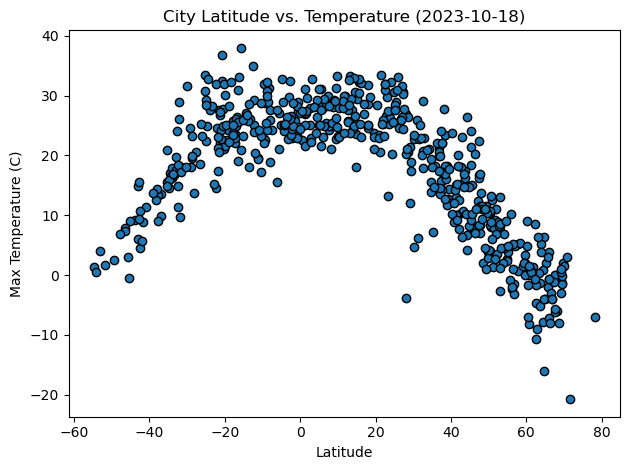

In [21]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], edgecolors='k')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature (2023-10-18)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

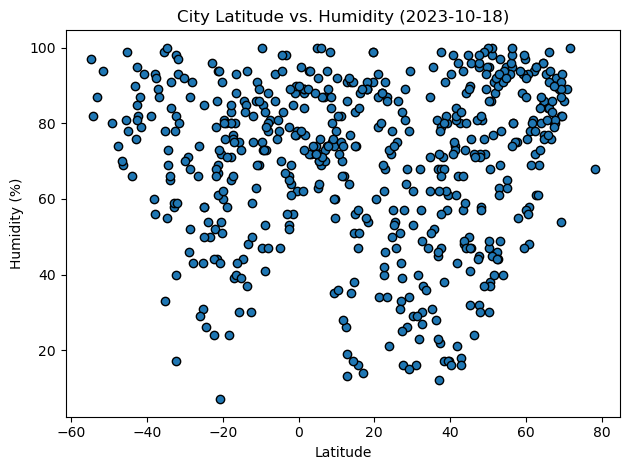

In [22]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], edgecolors='k')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (2023-10-18)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

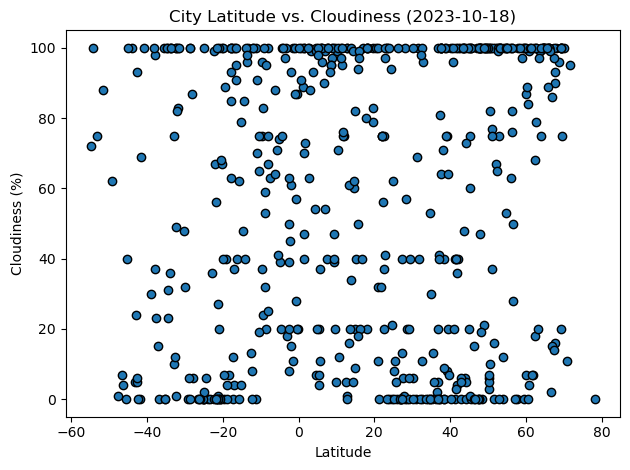

In [23]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], edgecolors='k')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (2023-10-18)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

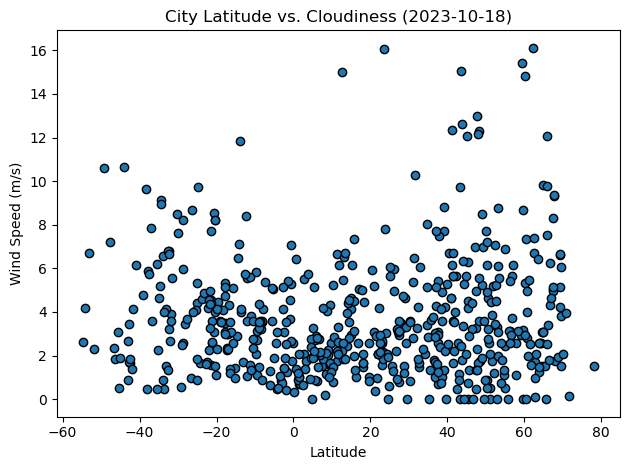

In [24]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], edgecolors='k')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Cloudiness (2023-10-18)")
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
def Plot_Linear_Regression(x_vals, y_vals, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    regress_values = x_vals * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals,regress_values, 'r-')
    line_eq_x = x_vals.min()
    line_eq_y = y_vals.min()
    plt.annotate(line_eq, (line_eq_x,line_eq_y), fontsize=15, color='red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print(f'The r-value is: {rvalue}')
    plt.show()
    return

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,kariapatti,9.6751,78.0999,33.29,55,20,2.57,IN,1697958605
3,bodaybo,57.8506,114.1933,5.17,55,100,1.11,RU,1697958578
5,neryungri,56.6709,124.6491,-1.51,80,50,3.73,RU,1697958606
7,weno,7.4515,151.8468,29.97,74,40,1.54,FM,1697958606
9,hadibu,12.6500,54.0333,25.73,91,100,14.99,YE,1697958607


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,2.46,80,62,10.62,TF,1697958605
1,adamstown,-25.0660,-130.1015,22.43,85,0,4.39,PN,1697958605
4,waitangi,-43.9535,-176.5597,9.22,66,100,10.64,NZ,1697958606
6,bredasdorp,-34.5322,20.0403,17.02,69,23,9.14,ZA,1697958606
8,invercargill,-46.4000,168.3500,7.81,69,4,1.84,NZ,1697958607


###  Temperature vs. Latitude Linear Regression Plot

## Note: (R-Value & Correlation)
None or very weak: r < 0.3
#### Weak: 0.3 ≤ r < 0.5
#### Moderate: 0.5 ≤ r < 0.7
#### Strong: r ≥ 0.7

The r-value is: -0.8851200429762155


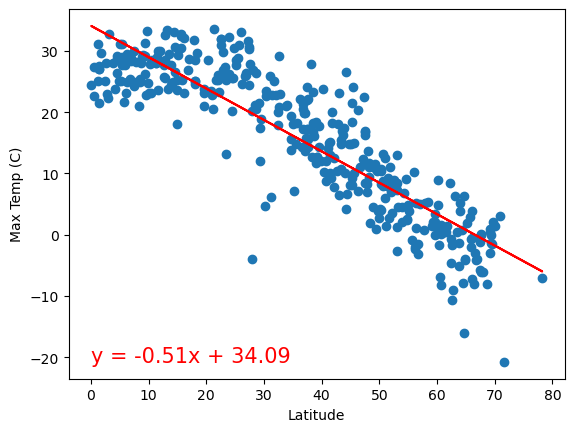

In [81]:
# Linear regression on Northern Hemisphere
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (C)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

The r-value is: 0.7377412347502816


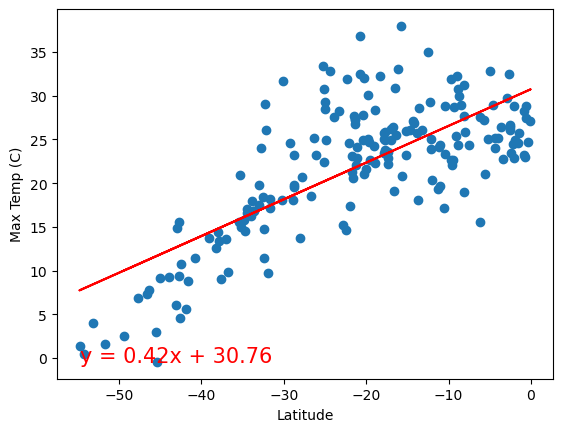

In [82]:
# Linear regression on Southern Hemisphere
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Max Temp']
x_label = 'Latitude'
y_label = 'Max Temp (C)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

**Discussion about the linear relationship:** The northern hemisphere has a strong negative correlation (r-value = -0.8) with the maximum temperature across the dataset, while the southern hemisphere has a strong positive correlation  (r-value = 0.7) with the maximum temperature across the dataset. In other words, the closer to the latitude gets to 0, we see the higher the maximum temperature gets.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1321051967791903


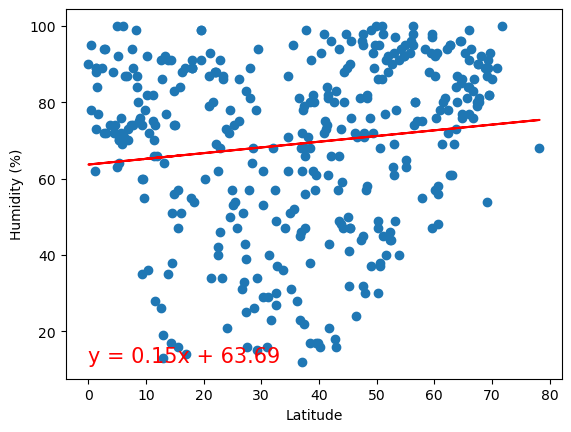

In [83]:
# Northern Hemisphere
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

The r-value is: -0.09834359658553742


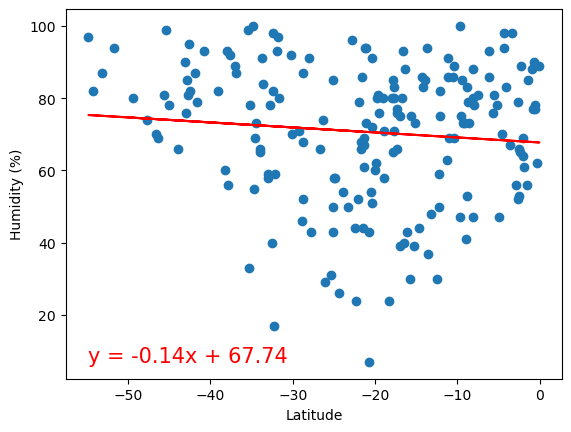

In [84]:
# Southern Hemisphere
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Humidity']
x_label = 'Latitude'
y_label = 'Humidity (%)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

**Discussion about the linear relationship:** The northern hemisphere has a weak positive correlation (r-value = 0.1) between the latitude and the level of humidity while the southern hemisphere has a very weak, positive correlation (r-value = -0.09) between the latitude and the humidity levels. That is, it shows more strongly for the northern hemisphere that the closer the latitude gets to 0, the more humid the area could be. The southern hemisphere almost has no correlation between the latitude level and the humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.06914664043083772


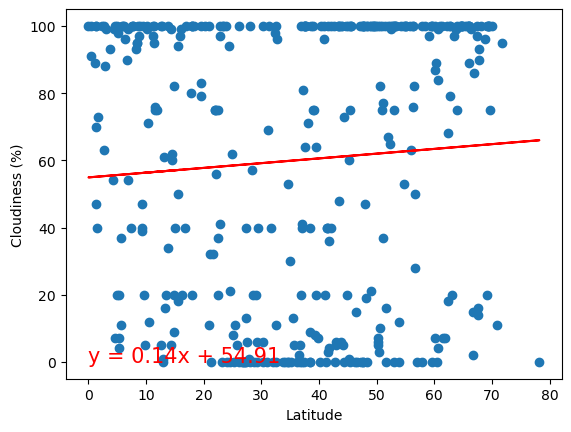

In [85]:
# Northern Hemisphere
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

The r-value is: 0.10333118778009931


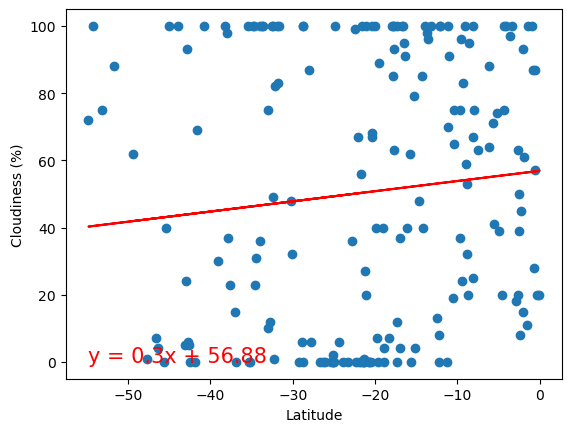

In [86]:
# Southern Hemisphere
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Cloudiness']
x_label = 'Latitude'
y_label = 'Cloudiness (%)'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

**Discussion about the linear relationship:** Both the northern hemisphere shows a very weak, positive correlation (r-value = 0.1), as does the southern hemisphere (r-value = 0.1), between the latitude and cloudiness level. That is, there is little to no relationship between the likelihood of it being cloudy when looking at the latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.20576092044006128


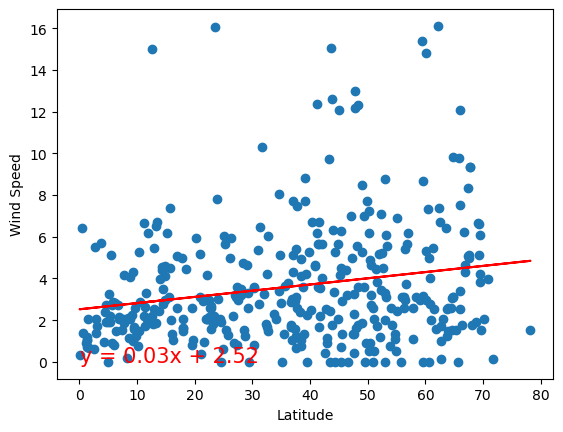

In [87]:
# Northern Hemisphere
x_vals = northern_hemi_df['Lat']
y_vals = northern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

The r-value is: -0.1882558650223555


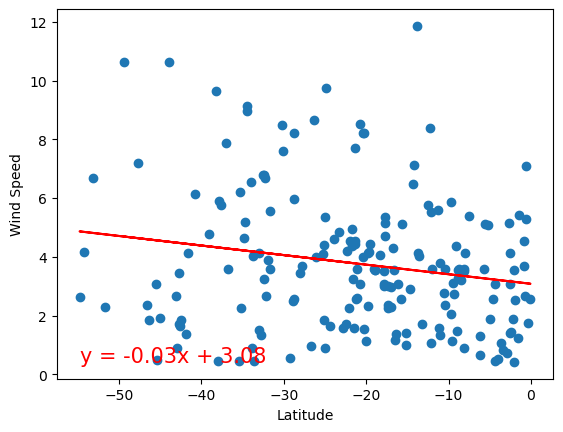

In [88]:
# Southern Hemisphere
x_vals = southern_hemi_df['Lat']
y_vals = southern_hemi_df['Wind Speed']
x_label = 'Latitude'
y_label = 'Wind Speed'
Plot_Linear_Regression(x_vals, y_vals, x_label, y_label)

**Discussion about the linear relationship:** In the nothern hemisphere weak correlation (r-value = 0.2) between the latitude and wind speed levels. In the southern hemisphere, there is a weak negative correlation (r-value = -0.1) between latitude and wind speed levels.